In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [5]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-20 18:11:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 108.177.11.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  88.0MB/s    in 1.2s    

2025-01-20 18:11:55 (88.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


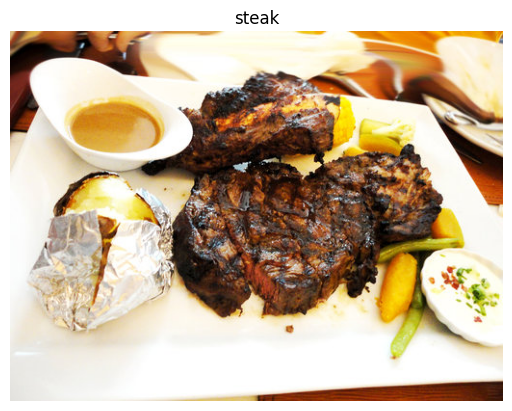

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 512, 3)


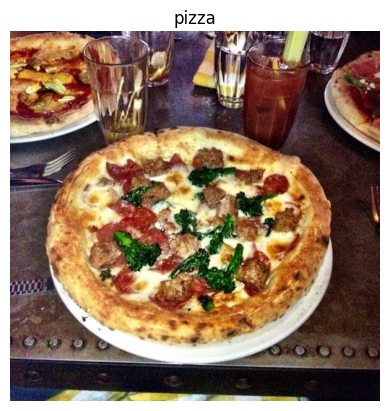

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
img.shape

(512, 512, 3)

In [13]:
img/255

array([[[0.52941176, 0.26666667, 0.20392157],
        [0.47843137, 0.21568627, 0.15294118],
        [0.44705882, 0.18039216, 0.12941176],
        ...,
        [0.03921569, 0.        , 0.04313725],
        [0.04705882, 0.        , 0.04705882],
        [0.09803922, 0.05098039, 0.09803922]],

       [[0.58431373, 0.32156863, 0.25490196],
        [0.4745098 , 0.21960784, 0.14901961],
        [0.52156863, 0.25882353, 0.19607843],
        ...,
        [0.05098039, 0.01176471, 0.05490196],
        [0.05098039, 0.00392157, 0.05098039],
        [0.09019608, 0.04313725, 0.09019608]],

       [[0.62745098, 0.37647059, 0.27843137],
        [0.52941176, 0.28627451, 0.19607843],
        [0.56470588, 0.30980392, 0.23137255],
        ...,
        [0.06666667, 0.01960784, 0.06666667],
        [0.05490196, 0.00784314, 0.05490196],
        [0.08235294, 0.03529412, 0.08235294]],

       ...,

       [[0.15294118, 0.2       , 0.34901961],
        [0.16862745, 0.22352941, 0.36862745],
        [0.16470588, 0

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed for reproducibility
tf.random.set_seed(42)

# Preprocess data (rescale pixel values to between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # resize images to 224x224
                                               class_mode="binary", # binary classification (pizza vs steak)
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)  # Don't shuffle validation data

# Print information about the loaded data
print("Training data:")
for image_batch, labels_batch in train_data:
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break  # Print info for only one batch

print("\nValidation data:")
for image_batch, labels_batch in valid_data:
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break  # Print info for only one batch

# Create a simple CNN model (Tiny VGG-like)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),  # Pooling layer to reduce spatial size
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),  # Flatten the 2D arrays to 1D for the Dense layers
    tf.keras.layers.Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

steps_per_epoch = len(train_data)
validation_steps = len(valid_data)

# Fit the model to the training data and validate on the test data
history_1 = model_1.fit(train_data,
                        epochs=6,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=valid_data,
                        validation_steps=validation_steps)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Training data:
Image batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)

Validation data:
Image batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)
Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.7029 - loss: 0.6039 - val_accuracy: 0.7320 - val_loss: 0.5295
Epoch 2/6


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.7781 - loss: 0.4857 - val_accuracy: 0.7820 - val_loss: 0.4547
Epoch 4/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8054 - loss: 0.4413 - val_accuracy: 0.8500 - val_loss: 0.3418
Epoch 6/6
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.5266 - loss: 114.1474 - val_accuracy: 0.5000 - val_loss: 2.1915
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.6208 - loss: 1.1051 - val_accuracy: 0.5060 - val_loss: 0.9793
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.7168 - loss: 0.5778 - val_accuracy: 0.7400 - val_loss: 0.5180


In [9]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.5116 - loss: 0.6875 - val_accuracy: 0.7200 - val_loss: 0.5725
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.7522 - loss: 0.5242 - val_accuracy: 0.8400 - val_loss: 0.4291
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8047 - loss: 0.4366 - val_accuracy: 0.8680 - val_loss: 0.3800


In [10]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [12]:
# Instead of using train_data.next(), use next(train_data)
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

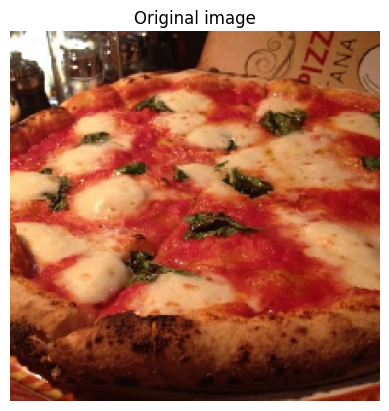

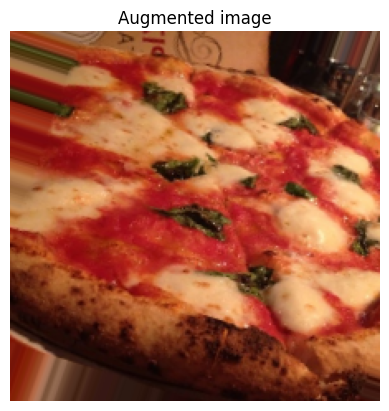

In [22]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [23]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 397ms/step - accuracy: 0.3756 - loss: 0.8121 - val_accuracy: 0.5400 - val_loss: 0.6864
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - accuracy: 0.5189 - loss: 0.6939 - val_accuracy: 0.5140 - val_loss: 0.6815
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 368ms/step - accuracy: 0.4533 - loss: 0.7022 - val_accuracy: 0.6860 - val_loss: 0.6821


In [16]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

train_data_augmented_unshuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [25]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 385ms/step - accuracy: 0.5409 - loss: 0.6830 - val_accuracy: 0.8080 - val_loss: 0.4769
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 390ms/step - accuracy: 0.6966 - loss: 0.5741 - val_accuracy: 0.8300 - val_loss: 0.4112
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 363ms/step - accuracy: 0.7450 - loss: 0.5681 - val_accuracy: 0.8280 - val_loss: 0.4157


In [45]:
from tensorflow.keras.layers import Dropout

my_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
my_model.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

my_model.fit(train_data_augmented_shuffled,
             epochs=5,
             steps_per_epoch=len(train_data_augmented_shuffled),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 472ms/step - accuracy: 0.6176 - loss: 1.8716 - val_accuracy: 0.8140 - val_loss: 0.4016
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 417ms/step - accuracy: 0.7340 - loss: 0.5289 - val_accuracy: 0.8400 - val_loss: 0.3861
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - accuracy: 0.7687 - loss: 0.5145 - val_accuracy: 0.8320 - val_loss: 0.4049


In [ ]:
#Epoch 9/9
#47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.7875 - loss: 0.4643 - val_accuracy: 0.8580 - val_loss: 0.3308


#Epoch 9/9
#47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 406ms/step - accuracy: 0.7933 - loss: 0.4642 - val_accuracy: 0.8520 - val_loss: 0.3416




In [46]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model
my_model = tf.keras.Sequential([
    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPool2D(),

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Regularization to reduce overfitting

    # Output layer for binary classification
    Dense(1, activation="sigmoid")
])

# Compile the model
my_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),  # Reduce learning rate on plateau
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Stop training if no improvement
]

# Train the model
history = my_model.fit(
    train_data_augmented_shuffled,
    epochs=20,  # Increase epochs for potential improvement
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=callbacks
)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 528ms/step - accuracy: 0.7106 - loss: 0.9147 - val_accuracy: 0.4900 - val_loss: 1.0118 - learning_rate: 0.0010
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 403ms/step - accuracy: 0.7594 - loss: 0.5451 - val_accuracy: 0.5020 - val_loss: 1.5109 - learning_rate: 0.0010
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.8106 - loss: 0.4916 - val_accuracy: 0.5060 - val_loss: 1.4557 - learning_rate: 0.0010
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.7982 - loss: 0.4778 - val_accuracy: 0.6580 - val_loss: 0.6992 - learning_rate: 0.0010
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.8011 - loss: 0.4599 - val_accuracy: 0.6000 - val_loss: 0.8750 - learning_rate: 0.0010
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 389us

In [51]:
my_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9141 - loss: 0.2384


[0.266390323638916, 0.8980000019073486]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


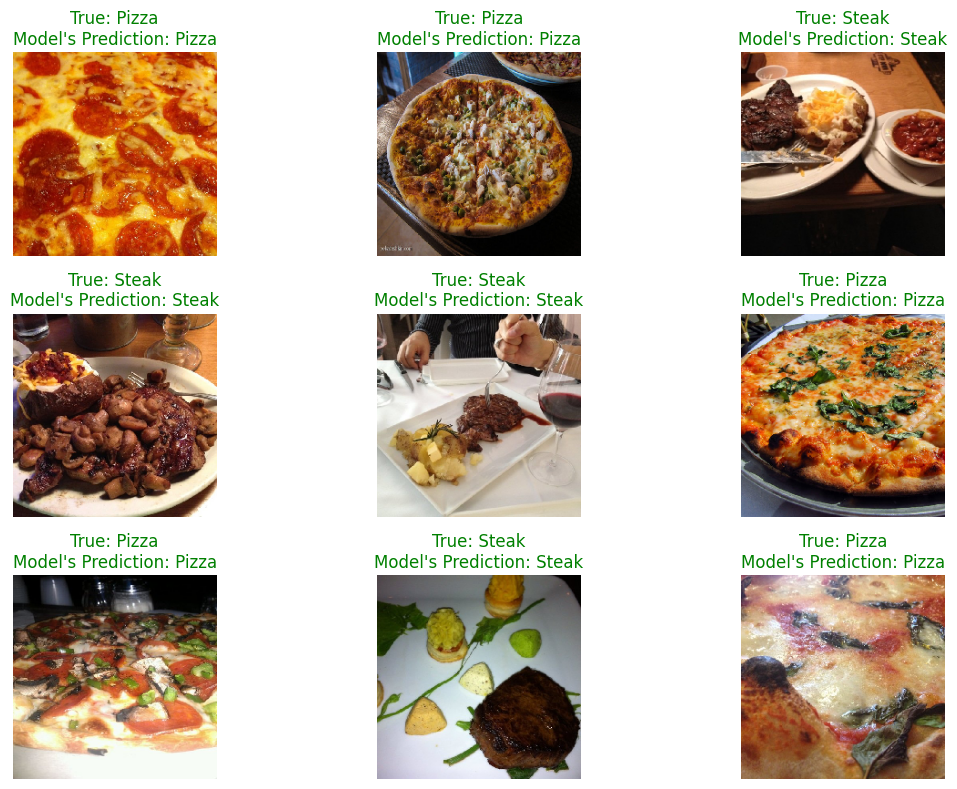

In [66]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels = next(iter(test_data))
predictions = my_model.predict(test_images)

predicted_classes = (predictions > 0.5).astype(int)  # Binary classification (Pizza = 0, Steak = 1)

class_names = ["Pizza", "Steak"]  # Class names corresponding to 0 and 1

# Visualize predictions with class names
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])

    true_label = class_names[test_labels[i].astype(int)]

    pred_label = class_names[predicted_classes[i][0]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"True: {true_label}\nModel's Prediction: {pred_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model
my_model2 = tf.keras.Sequential([
    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPool2D(),

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(),

    # Convolutional block 3
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Regularization to reduce overfitting

    # Output layer for binary classification
    Dense(1, activation="sigmoid")
])

# Compile the model
my_model2.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),  # Reduce learning rate on plateau
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Stop training if no improvement
]

# Train the model
history = my_model2.fit(
    train_data_augmented_shuffled,
    epochs=20,  # Increase epochs for potential improvement
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=callbacks
)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 527ms/step - accuracy: 0.6668 - loss: 0.8391 - val_accuracy: 0.4700 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.7824 - loss: 0.5419 - val_accuracy: 0.5080 - val_loss: 0.9612 - learning_rate: 0.0010
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 368ms/step - accuracy: 0.8117 - loss: 0.4325 - val_accuracy: 0.7740 - val_loss: 0.5495 - learning_rate: 0.0010
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 384ms/step - accuracy: 0.8023 - loss: 0.4246 - val_accuracy: 0.7040 - val_loss: 0.5614 - learning_rate: 0.0010
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━

In [47]:
my_model2.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9200 - loss: 0.2042


[0.21173033118247986, 0.9179999828338623]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


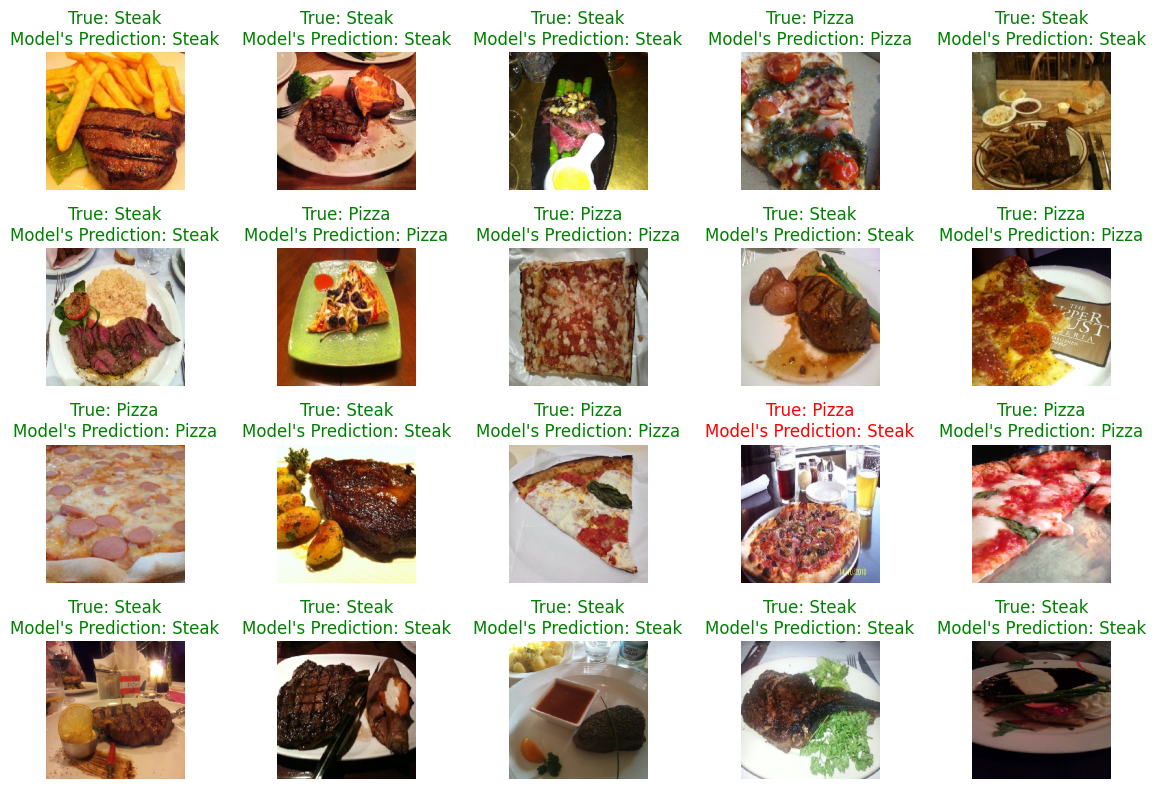

In [78]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels = next(iter(test_data))
predictions = my_model2.predict(test_images)

predicted_classes = (predictions > 0.5).astype(int)  # Binary classification (Pizza = 0, Steak = 1)

class_names = ["Pizza", "Steak"]  # Class names corresponding to 0 and 1

# Visualize predictions with class names
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_images[i])

    true_label = class_names[test_labels[i].astype(int)]

    pred_label = class_names[predicted_classes[i][0]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"True: {true_label}\nModel's Prediction: {pred_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()

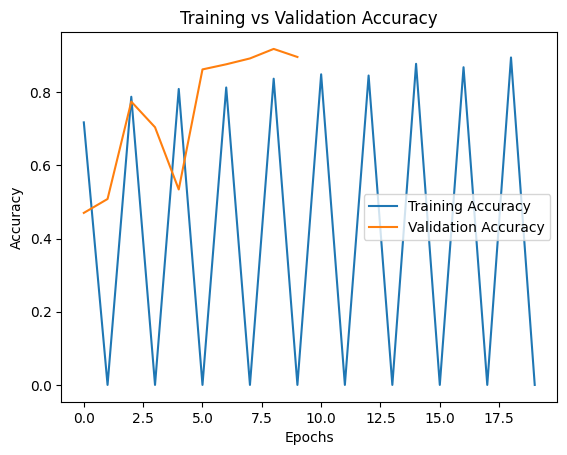

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()